In [1]:
import pandas as pd
import numpy as np

In [2]:
D9 = pd.read_csv('911.csv')

In [3]:
D9.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,10-12-2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
D9['timeStamp']=D9['timeStamp'].astype(np.datetime64)
D9['daytimeStamp'] = D9['timeStamp'].dt.weekday_name
D9['MonthtimeStamp'] = D9['timeStamp'].dt.month

In [5]:
D9.dtypes

lat                      float64
lng                      float64
desc                      object
zip                      float64
title                     object
timeStamp         datetime64[ns]
twp                       object
addr                      object
e                          int64
daytimeStamp              object
MonthtimeStamp             int64
dtype: object

In [6]:
D9.isnull().sum()

lat                   0
lng                   0
desc                  0
zip               32494
title                 0
timeStamp             0
twp                  95
addr                  0
e                     0
daytimeStamp          0
MonthtimeStamp        0
dtype: int64

In [7]:
D9.zip.unique()

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 17752., 19111., 18927., 19435., 18951., 19472.,
       19503., 19126., 19505., 19423., 19138., 36107., 18036., 19116.,
       19139., 19129., 19115., 19355., 77316., 19457., 19082., 19127.,
       19443., 17555., 19520., 19063., 19020., 19404., 19382., 19474.,
      

# Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 present ?

In [8]:
D9['zip'].value_counts().head(10)

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: zip, dtype: int64

# Answer : Yes

# Compute -- What are the top 4 townships (twp) for 911 calls?

In [9]:
D9['twp'].value_counts().head(4)

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: twp, dtype: int64

# Question 2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN,HORSHAM, ABINGTON 

LOWER POTTSGROVE and HORSHAM

# Compute -- Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second

In [10]:
name1 = D9["title"].str.split(":",n=1,expand=True)

In [11]:
D9['CommonReason']=name1[0]

In [12]:
D9['CommonReason'].value_counts()

EMS        133234
Traffic     93400
Fire        39909
Name: CommonReason, dtype: int64

# Compute -- Plot barchart using matplot for 911 calls by Reason & Question 4: Howcan you plot the bars horizontally ?

In [13]:
import matplotlib.pyplot as plt

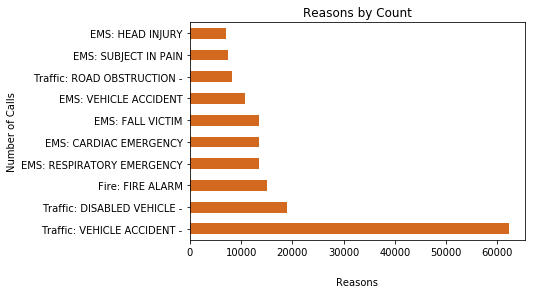

In [14]:
D9['title'].value_counts().head(10).plot.barh(color = 'chocolate')
plt.xlabel('Reasons', labelpad = 20)
plt.ylabel('Number of Calls')
plt.title('Reasons by Count')
plt.show()

# Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

In [15]:
from datetime import datetime as dt
from dateutil.parser import parse

In [16]:
EMS=D9[D9['CommonReason']=='EMS']
EMS['timeStamp']=EMS['timeStamp'].astype(np.datetime64)
EMS['daytimeStamp'] = EMS['timeStamp'].dt.weekday_name
EMS['daytimeStamp'].value_counts()

C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\G705961\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Friday       19797
Monday       19175
Tuesday      19120
Saturday     19050
Wednesday    19031
Thursday     18941
Sunday       18120
Name: daytimeStamp, dtype: int64

# Compute -- Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest ?

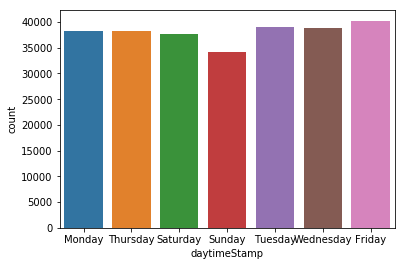

In [17]:
import seaborn as sns
traffic=D9[D9['CommonReason']=='Traffic']
sns.countplot(x="daytimeStamp", data=D9)

# Compute -- Create a countplot month wise -- Question 7: Which month saw highest calls for fire?

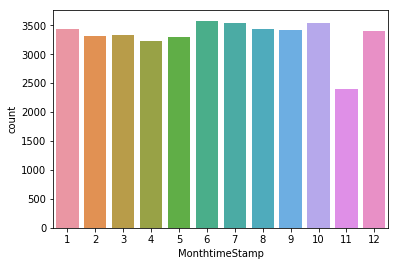

In [18]:
fire = D9[D9['CommonReason']=='Fire']
sns.countplot(x="MonthtimeStamp", data=fire)

# Compute -- Create Web Map for Traffic Calls & Question 8: Why some areas seem to have lower or almost zero traffic calls? Hint: Zoom the map

In [19]:
#pip install folium

In [20]:
import folium as mp

lon = list(traffic['lng'])
lat = list(traffic['lat'])
cal = list(traffic['CommonReason'])

In [21]:
def getcolor(elevation):
    if elevation=='EMS':
        return('red')
    elif elevation=='Fire':
        return('blue')
    else:
        return('black')

In [22]:
for x in cal:
    getcolor(x)

In [23]:
map11 = mp.Map(location=[48.111801,-121.111000],zoom_start=5,tiles='stamenterrain')

In [ ]:
fgv1 = mp.FeatureGroup(name = '911 Status')
for lt,ln,cl in zip(lat,lon,cal):
    fgv1.add_child(mp.Marker(location=[lt,ln],popup=str(cl)+" Call",icon=mp.Icon(getcolor(cal))))
map11.add_child(fgv1)
map11.add_child(mp.LayerControl())
map11